In [1]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os

In [2]:
# Download dan import library split_folders
!pip install split_folders
import split_folders

In [3]:
# Download dataset langsung dari link
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-07 09:51:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.67MB/s    in 60s     

2020-07-07 09:52:13 (5.15 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# Melakukan ekstraksi pada file hasil download
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
# Menentukan base directory
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'

In [5]:
# Melakukan split folder dengan rasio 80 % data train, 20 % data validasi
split_folders.ratio(base_dir, output=base_dir, seed=155, ratio=(.8, .2))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 2898.91 files/s]


In [6]:
# cek apakah folder train sudah siap
print(os.listdir('/tmp/rockpaperscissors/rps-cv-images/train'))
# cek apakah folder validasi sudah siap
print(os.listdir('/tmp/rockpaperscissors/rps-cv-images/val'))

['rock', 'scissors', 'paper']
['rock', 'scissors', 'paper']


In [7]:
# Membuat image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [8]:
# Memisahkan train data dengan validation data
# Direktori data training
train_generator = datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        batch_size=6,
        class_mode='categorical')

# Direktori data validasi
validation_generator = datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=6, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([    
            tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu',
                  input_shape=(150, 150 ,3)),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(32, 3, padding='valid', activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, 3, padding='valid', activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax' )
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Nadam(),
              metrics=['accuracy'])

In [11]:
plotting = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 10s - loss: 1.2744 - accuracy: 0.3667 - val_loss: 1.1009 - val_accuracy: 0.2667
Epoch 2/20
25/25 - 10s - loss: 1.0857 - accuracy: 0.4133 - val_loss: 1.0094 - val_accuracy: 0.4667
Epoch 3/20
25/25 - 10s - loss: 1.0060 - accuracy: 0.5133 - val_loss: 0.9371 - val_accuracy: 0.4333
Epoch 4/20
25/25 - 10s - loss: 0.9123 - accuracy: 0.6067 - val_loss: 0.8844 - val_accuracy: 0.6667
Epoch 5/20
25/25 - 10s - loss: 0.7135 - accuracy: 0.7400 - val_loss: 0.8497 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 10s - loss: 0.6563 - accuracy: 0.7667 - val_loss: 0.5036 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 10s - loss: 0.4773 - accuracy: 0.8400 - val_loss: 0.3532 - val_accuracy: 0.9667
Epoch 8/20
25/25 - 10s - loss: 0.3865 - accuracy: 0.8533 - val_loss: 0.4034 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 10s - loss: 0.4102 - accuracy: 0.8733 - val_loss: 0.1929 - val_accuracy: 0.9667
Epoch 10/20
25/25 - 10s - loss: 0.3583 - accuracy: 0.8400 - val_loss: 0.2235 - val_accuracy: 0.9333
Epoch 11/

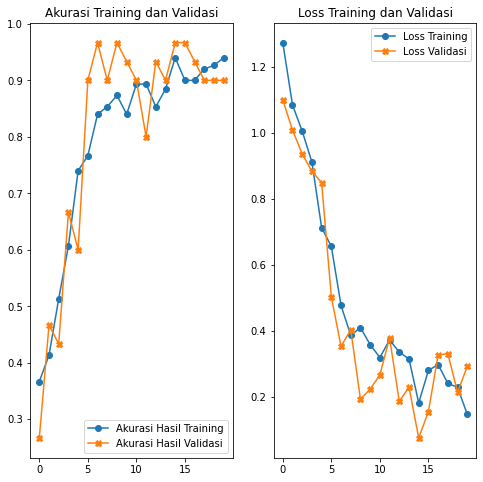

In [22]:
# Membuat plotting untuk accuracy dan loss
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

accur = plotting.history['accuracy']
val_accur = plotting.history['val_accuracy']

loss = plotting.history['loss']
val_loss = plotting.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accur, marker='o', label='Akurasi Hasil Training')
plt.plot(epochs_range, val_accur, marker='X', label='Akurasi Hasil Validasi')
plt.legend()
plt.title('Akurasi Training dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, marker='o', label='Loss Training')
plt.plot(epochs_range, val_loss, marker='X', label='Loss Validasi')
plt.legend()
plt.title('Loss Training dan Validasi')
plt.show()

Using TensorFlow backend.


Saving 4UMcbmjgoJ8vsU3G.png to 4UMcbmjgoJ8vsU3G.png
4UMcbmjgoJ8vsU3G.png
Rock


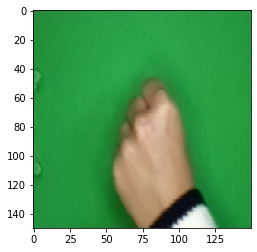

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

Saving 9OyGmAsWD5Ie6QIa.png to 9OyGmAsWD5Ie6QIa.png
9OyGmAsWD5Ie6QIa.png
Paper


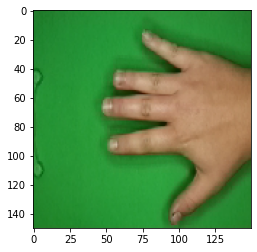

In [25]:
# Percobaan upload file kedua
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

Saving aDk2yxglXt7Xkrzw.png to aDk2yxglXt7Xkrzw.png
aDk2yxglXt7Xkrzw.png
Scissors


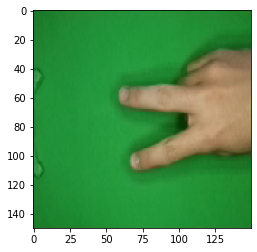

In [26]:
# Percobaan upload file ketiga
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')